# S&P 500 vs NASDAQ 100

In [1]:
# What's the difference
# Analysis and Comparison of S&P and NASDAQ

# Import Libraries

In [2]:
import datetime
import calendar
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
# Top 10 SPY asset holdings
h_spy = {'SPY':[6.37, 5.39, 4.49, 2.21, 1.75, 1.72, 1.51, 1.27, 1.2, 1.18]} 
df_h_spy = pd.DataFrame(h_spy, index =['Apple', 'Microsoft', 'Amazon', 'Facebook', 'Alphabet A', 'Alphabet C', 'Berkshire Hathaway B', 'Johnson & Johnson', 'JPMorgan Chase', 'Visa A'])
df_h_spy

,SPY
Apple,6.37
Microsoft,5.39
Amazon,4.49
Facebook,2.21
Alphabet A,1.75
Alphabet C,1.72
Berkshire Hathaway B,1.51
Johnson & Johnson,1.27
JPMorgan Chase,1.20
Visa A,1.18


In [4]:
# Top 10 QQQ asset holdings
h_qqq = {'QQQ':[12.81, 10.19, 9.98, 4.42, 4.19, 3.8, 3.69, 2.65, 2.02, 1.84]} 
df_h_qqq = pd.DataFrame(h_qqq, index =['Apple', 'Microsoft', 'Amazon', 'Tesla', 'Facebook', 'Alphabet A', 'Alphabet C', 'NVIDIA', 'PayPal', 'Adobe'])
df_h_qqq

,QQQ
Apple,12.81
Microsoft,10.19
Amazon,9.98
Tesla,4.42
Facebook,4.19
Alphabet A,3.80
Alphabet C,3.69
NVIDIA,2.65
PayPal,2.02
Adobe,1.84


In [5]:
# Join holdings into one table
holdings = pd.merge(df_h_spy, df_h_qqq, how='outer', left_index=True, right_index=True)
holdings.sort_values(by=['SPY'], ascending=False)

,SPY,QQQ
Apple,6.37,12.81
Microsoft,5.39,10.19
Amazon,4.49,9.98
Facebook,2.21,4.19
Alphabet A,1.75,3.80
Alphabet C,1.72,3.69
Berkshire Hathaway B,1.51,NaN
Johnson & Johnson,1.27,NaN
JPMorgan Chase,1.20,NaN
Visa A,1.18,NaN


# S&P 500 Data

In [6]:
# Start date
start_date = datetime.datetime(1990,1,1)

# Today's Date
end_date = datetime.date.today()

# Pull Data
df_sp500 = web.DataReader('^GSPC','yahoo',start_date, end_date)

# Reset index after creating date column
df_sp500 = df_sp500.reset_index()

# NASDAQ 100 Data

In [7]:
# Start date
start_date = datetime.datetime(1990,1,1)

# Today's date
end_date = datetime.date.today()

# Pull Data
df_nd100 = web.DataReader('^NDX','yahoo',start_date,end_date)

# Reset index after creating date column
df_nd100 = df_nd100.reset_index()

# First Look (Index)

In [8]:
# Make one dataframe of date and adjusted close price of SPY and VOO
df_ind = pd.DataFrame(df_sp500['Date'])
df_ind['SP500'] = df_sp500['Adj Close']
df_ind['ND100'] = df_nd100['Adj Close']

C:\Users\mchin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


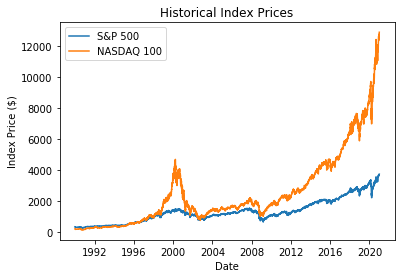

In [9]:
# Plot all data
plt.plot(df_ind['Date'],df_ind['SP500'],'C0')
plt.plot(df_ind['Date'],df_ind['ND100'],'C1')
plt.xlabel('Date')
plt.ylabel('Index Price ($)')
plt.legend(['S&P 500','NASDAQ 100'])
plt.title('Historical Index Prices')
plt.show()

# SPY Data

In [10]:
# Start date
start_date = datetime.datetime(2000,1,1)

# Today's Date
end_date = datetime.date.today()

# Pull Data
df_spy = web.DataReader('SPY','yahoo',start_date, end_date)

# Reset index after creating date column
df_spy = df_spy.reset_index()

# QQQ Data

In [11]:
# Start date
start_date = datetime.datetime(2000,1,1)

# Today's date
end_date = datetime.date.today()

# Pull Data
df_qqq = web.DataReader('QQQ','yahoo',start_date,end_date)

# Reset index after creating date column
df_qqq = df_qqq.reset_index()

# First Look (ETF)

In [12]:
# Make one dataframe of date and adjusted close price of SPY and VOO
df_etf = pd.DataFrame(df_spy['Date'])
df_etf['SPY'] = df_spy['Adj Close']
df_etf['QQQ'] = df_qqq['Adj Close']

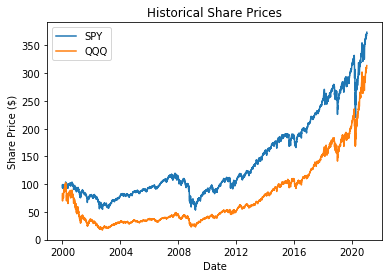

In [13]:
# Plot all data
plt.plot(df_etf['Date'],df_etf['SPY'],'C0')
plt.plot(df_etf['Date'],df_etf['QQQ'],'C1')
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.legend(['SPY','QQQ'])
plt.title('Historical Share Prices')
plt.show()

In [14]:
# ETF price stats
df_etf.describe()

,SPY,QQQ
count,5284.000000,5284.000000
mean,140.957935,78.187717
std,74.641769,60.287773
min,53.503864,17.459492
25%,86.894154,34.937085
50%,106.692188,51.556118
75%,186.632206,102.883266
max,373.880005,313.739990


# Percent Change

# Daily

In [15]:
# Day-to-day percent change
df_etf['SPY Percent Change'] = (df_etf['SPY'].pct_change())*100
df_etf['QQQ Percent Change'] = (df_etf['QQQ'].pct_change())*100

In [16]:
# Flag ETF with greater percent change
df_etf['Greater'] = np.where(df_etf['SPY Percent Change']>df_etf['QQQ Percent Change'],'SPY',np.where(df_etf['SPY Percent Change']==df_etf['QQQ Percent Change'],'Equal','QQQ'))

# Percent change difference
df_etf['daily diff'] = df_etf['SPY Percent Change']-df_etf['QQQ Percent Change']

Text(0.5, 1.0, 'Number of days an ETF increased more')

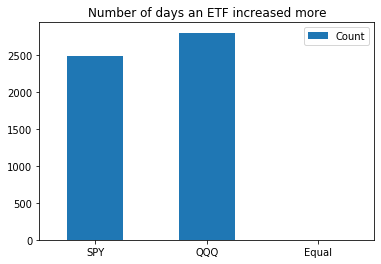

In [17]:
# Get counts of 'Greater' flag
etf_counts_daily = df_etf['Greater'].value_counts()
df_len_daily = len(df_etf)
equal_counts_daily = df_len_daily-sum(etf_counts_daily)

# Bar Plot
bar_df_daily = pd.DataFrame({'ETF':['SPY', 'QQQ', 'Equal'], 'Count':[etf_counts_daily[1],etf_counts_daily[0],equal_counts_daily]})
bar_plot_daily = bar_df_daily.plot.bar(x='ETF', y='Count', rot=0)
plt.xlabel('')
plt.title('Number of days an ETF increased more')

C:\Users\mchin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:391: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\mchin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:392: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
C:\Users\mchin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mchin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Count')

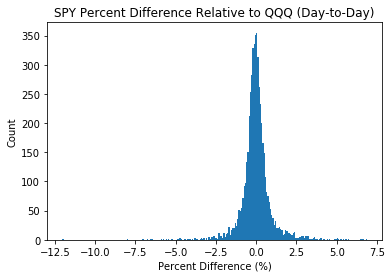

In [18]:
# Plot histogram of percent change differences
daily_per_hist = plt.hist(df_etf['daily diff'], bins = 'auto')
plt.title('SPY Percent Difference Relative to QQQ (Day-to-Day)')
plt.xlabel('Percent Difference (%)')
plt.ylabel('Count')

# 1-Year

In [19]:
# Create function to calculate returns
def year_percent_change(df_etf, yr):
    # create new dataframe
    df_yr_return = pd.DataFrame(df_etf, columns = ['Date','SPY','QQQ'])
    
    # create new column for dates 1-year later
    yr_col = 'Date ' + str(yr) + '-year'
    df_yr_return[yr_col] = df_yr_return['Date'] + pd.DateOffset(years = yr)

    # create dataframe of historical data to left join to 1-year later dates
    df_join = pd.DataFrame(df_etf, columns = ['Date','SPY','QQQ'])
    df_join.columns = [yr_col,'SPY','QQQ']

    # left join historical data to 1-year later dates
    df_yr_return = pd.merge(df_yr_return,df_join,on=yr_col,how='left').dropna()
    
    # calculate 1-year percent change
    yr_year = str(yr) + '-year'
    spy_yr = 'SPY ' + yr_year
    qqq_yr = 'QQQ ' + yr_year
    df_yr_return[spy_yr] = (df_yr_return['SPY_y']/df_yr_return['SPY_x'])*100
    df_yr_return[qqq_yr] = (df_yr_return['QQQ_y']/df_yr_return['QQQ_x'])*100

    # flag ETF with greater percent change
    df_yr_return['Greater'] = np.where(df_yr_return[spy_yr]>df_yr_return[qqq_yr],'SPY',np.where(df_yr_return[spy_yr]==df_yr_return[qqq_yr],'Equal','QQQ'))

    # calculate percent change differences
    yr_diff = yr_year + ' diff'
    df_yr_return[yr_diff] = df_yr_return[spy_yr]-df_yr_return[qqq_yr]

    # Get counts for 'Greater' flag
    etf_counts = df_yr_return['Greater'].value_counts()
    df_len = len(df_yr_return)
    equal_counts = df_len-sum(etf_counts)
    
    return df_yr_return, etf_counts, equal_counts


In [20]:
# Create function to plot bar chart
def bar_chart(etf_counts, equal_counts, yr):
    # bar plot
    bar_df = pd.DataFrame({'ETF':['SPY', 'QQQ', 'Equal'], 'Count':[etf_counts[1],etf_counts[0],equal_counts]})
    bar_plot = bar_df.plot.bar(x='ETF', y='Count', rot=0)
    plt.xlabel('')
    plt.title('Number of ' + str(yr) + '-year periods an ETF increased more')

In [21]:
# Create function to plot histogram
def hist_chart(df_yr_return, yr):
    # histogram of percent change differences after 1-year
    yr_col = str(yr) + '-year diff'
    yr_title = str(yr) + '-year'
    yr_per_hist = plt.hist(df_yr_return[yr_col], bins = 'auto')
    plt.title('SPY Percent Difference Relative to QQQ (' + yr_title + ')')
    plt.xlabel('Percent Difference (%)')
    plt.ylabel('Count')

In [22]:
# Calculate 1-year returns
y1_return_1, y1_return_2, y1_return_3 = year_percent_change(df_etf, 1)

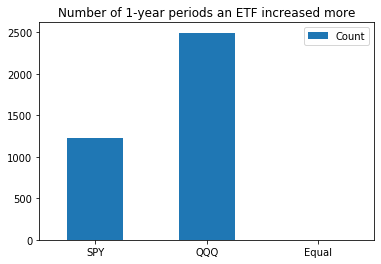

In [23]:
# Plot 1-year bar chart
y1_bar = bar_chart(y1_return_2, y1_return_3, 1)

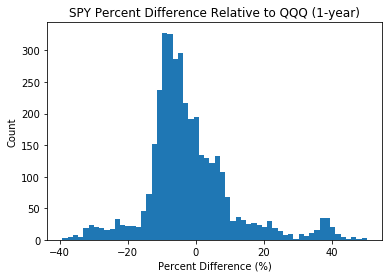

In [24]:
# Plot 1-year histogram
y1_hist = hist_chart(y1_return_1, 1)

In [25]:
# 1-year return stats
y1_return_1.describe()

,SPY_x,QQQ_x,SPY_y,QQQ_y,SPY 1-year,QQQ 1-year,1-year diff
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000
mean,131.090108,68.852190,142.414674,77.209400,107.784638,109.812931,-2.028293
std,63.536945,46.095748,74.902582,60.066914,16.506389,25.410340,12.989882
min,53.503864,17.459492,54.045895,17.459492,52.645897,30.615592,-39.148806
25%,85.907768,34.303350,86.146782,34.522491,101.423829,102.127894,-8.969690
50%,103.053917,48.604555,108.417709,48.783566,111.389243,113.829715,-4.434344
75%,175.154758,95.823725,187.390438,103.715279,117.911578,126.236102,3.080412
max,315.959503,211.406387,373.880005,313.739990,171.942026,182.784806,50.254265


# 5-Year

In [26]:
# Calculate 5-year returns
y5_return_1, y5_return_2, y5_return_3 = year_percent_change(df_etf, 5)

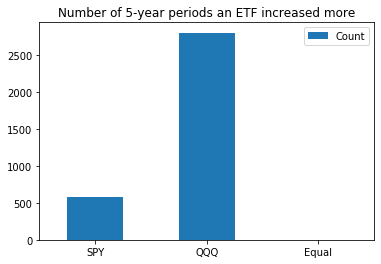

In [27]:
# Plot 5-year bar chart
y5_bar = bar_chart(y5_return_2, y5_return_3, 5)

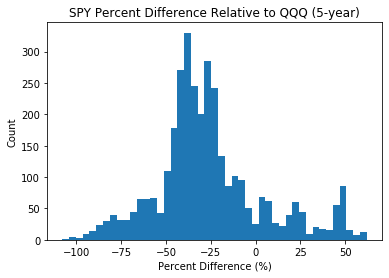

In [28]:
# Plot 5-year histogram
y5_hist = hist_chart(y5_return_1, 5)

In [29]:
# 5-year return stats
y5_return_1.describe()

,SPY_x,QQQ_x,SPY_y,QQQ_y,SPY 5-year,QQQ 5-year,5-year diff
count,3386.000000,3386.000000,3386.000000,3386.000000,3386.000000,3386.000000,3386.000000
mean,105.404501,50.124360,160.771032,91.135295,150.409489,176.308822,-25.899334
std,34.101735,23.606841,76.544577,65.080724,44.865581,67.110989,30.196422
min,54.045895,17.459492,53.503864,22.731062,65.128263,31.159330,-107.720241
25%,81.633501,32.775189,97.946789,40.211440,106.327638,128.601925,-42.221003
50%,96.788704,41.212219,124.718426,62.465155,155.033189,177.810527,-30.148550
75%,114.488506,62.031839,209.683758,116.676590,188.945293,229.829144,-13.862684
max,190.884201,110.037781,373.880005,313.739990,303.273901,364.490323,62.034755


# 10-Year

In [30]:
# Calculate 10-year returns
y10_return_1, y10_return_2, y10_return_3 = year_percent_change(df_etf, 10)

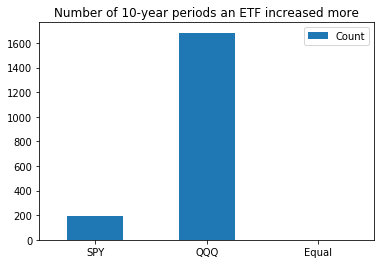

In [31]:
# Plot 10-year bar chart
y10_bar = bar_chart(y10_return_2, y10_return_3, 10)

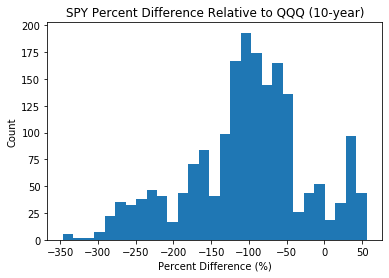

In [32]:
# Plot 10-year histogram
y10_hist = hist_chart(y10_return_1, 10)

In [33]:
# 10-year return stats
y10_return_1.describe()

,SPY_x,QQQ_x,SPY_y,QQQ_y,SPY 10-year,QQQ 10-year,10-year diff
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,87.387743,38.269105,191.294793,115.658791,220.786228,322.811520,-102.025292
std,14.898894,14.278610,72.675992,63.889377,81.831789,157.850464,79.368959
min,54.045895,17.459492,83.415825,38.167866,82.657919,41.863862,-346.873622
25%,76.594086,30.546121,122.370895,62.024904,189.927638,251.874544,-143.833465
50%,87.929790,35.736631,185.514885,102.175785,205.305789,301.188511,-97.062093
75%,97.564810,41.457865,250.927364,157.018394,240.420589,384.512522,-56.218601
max,119.400124,102.322060,373.880005,313.739990,497.382157,752.568384,56.397221


In [34]:
# 10-year percent difference less than -300%
pd.set_option('display.max_rows', None)
y10_return_1[y10_return_1['10-year diff']<-300]

,Date,SPY_x,QQQ_x,Date 10-year,SPY_y,QQQ_y,SPY 10-year,QQQ 10-year,Greater,10-year diff
2673,2010-08-19,87.478333,40.372227,2020-08-19,334.459778,275.600464,382.334423,682.648658,QQQ,-300.314235
2674,2010-08-20,87.194534,40.426208,2020-08-20,335.501160,279.423523,384.773154,691.193989,QQQ,-306.420835
2676,2010-08-24,85.572762,39.283257,2020-08-24,340.103058,283.116821,397.443125,720.706088,QQQ,-323.262962
2677,2010-08-25,85.905235,39.661243,2020-08-25,341.293182,285.342773,397.290318,719.449893,QQQ,-322.159575
2678,2010-08-26,85.329514,39.184265,2020-08-26,344.714844,291.431763,403.980791,743.746914,QQQ,-339.766123
2679,2010-08-27,86.651260,39.661243,2020-08-27,345.468567,290.523376,398.688450,732.512023,QQQ,-333.823573
2681,2010-08-31,85.394386,39.112255,2020-08-31,346.440552,294.346466,405.694761,752.568384,QQQ,-346.873622
2682,2010-09-01,87.948669,40.282223,2020-09-01,349.703522,299.377380,397.622299,743.199754,QQQ,-345.577455
2683,2010-09-02,88.767677,40.732204,2020-09-02,354.761627,302.212219,399.651808,741.949088,QQQ,-342.297280
2684,2010-09-03,89.919128,41.407162,2020-09-03,342.552765,286.889984,380.956500,692.851121,QQQ,-311.894621
